### Class 03 - Example

In this notebook, we will build on what we did last week and explore the potential of regularization.

Today's tasks are the following:
1. Go back to your data and consider whether any data transformations (e.g., standardization) is needed. If so, take a look at available preprocessing extractors: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing. `StandardScaler` and `MinMaxScaler` are the ones you want to consider;
2. Apply L1 and L2 regularization to your models, using `Lasso` and `Ridge` estimators from sklearn. You'll want to select a reasonable regularization parameter `alpha`;
3. Visualize the impact of regularization on performance and predictors.

Let's get started!

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import pickle as pkl
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler


In [77]:
from sklearn.neighbors import KNeighborsRegressor


First, let's load our dataset. Here, I will reload a dataset to make the example complete, but you can import your training, development and test sets from the last exercise.

In [31]:
display(data)
data.info()

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [32]:
data = pd.read_csv("/work/Project Files/data/class_01/bikes.csv")
X = data["hr"]
y = data["cnt"]

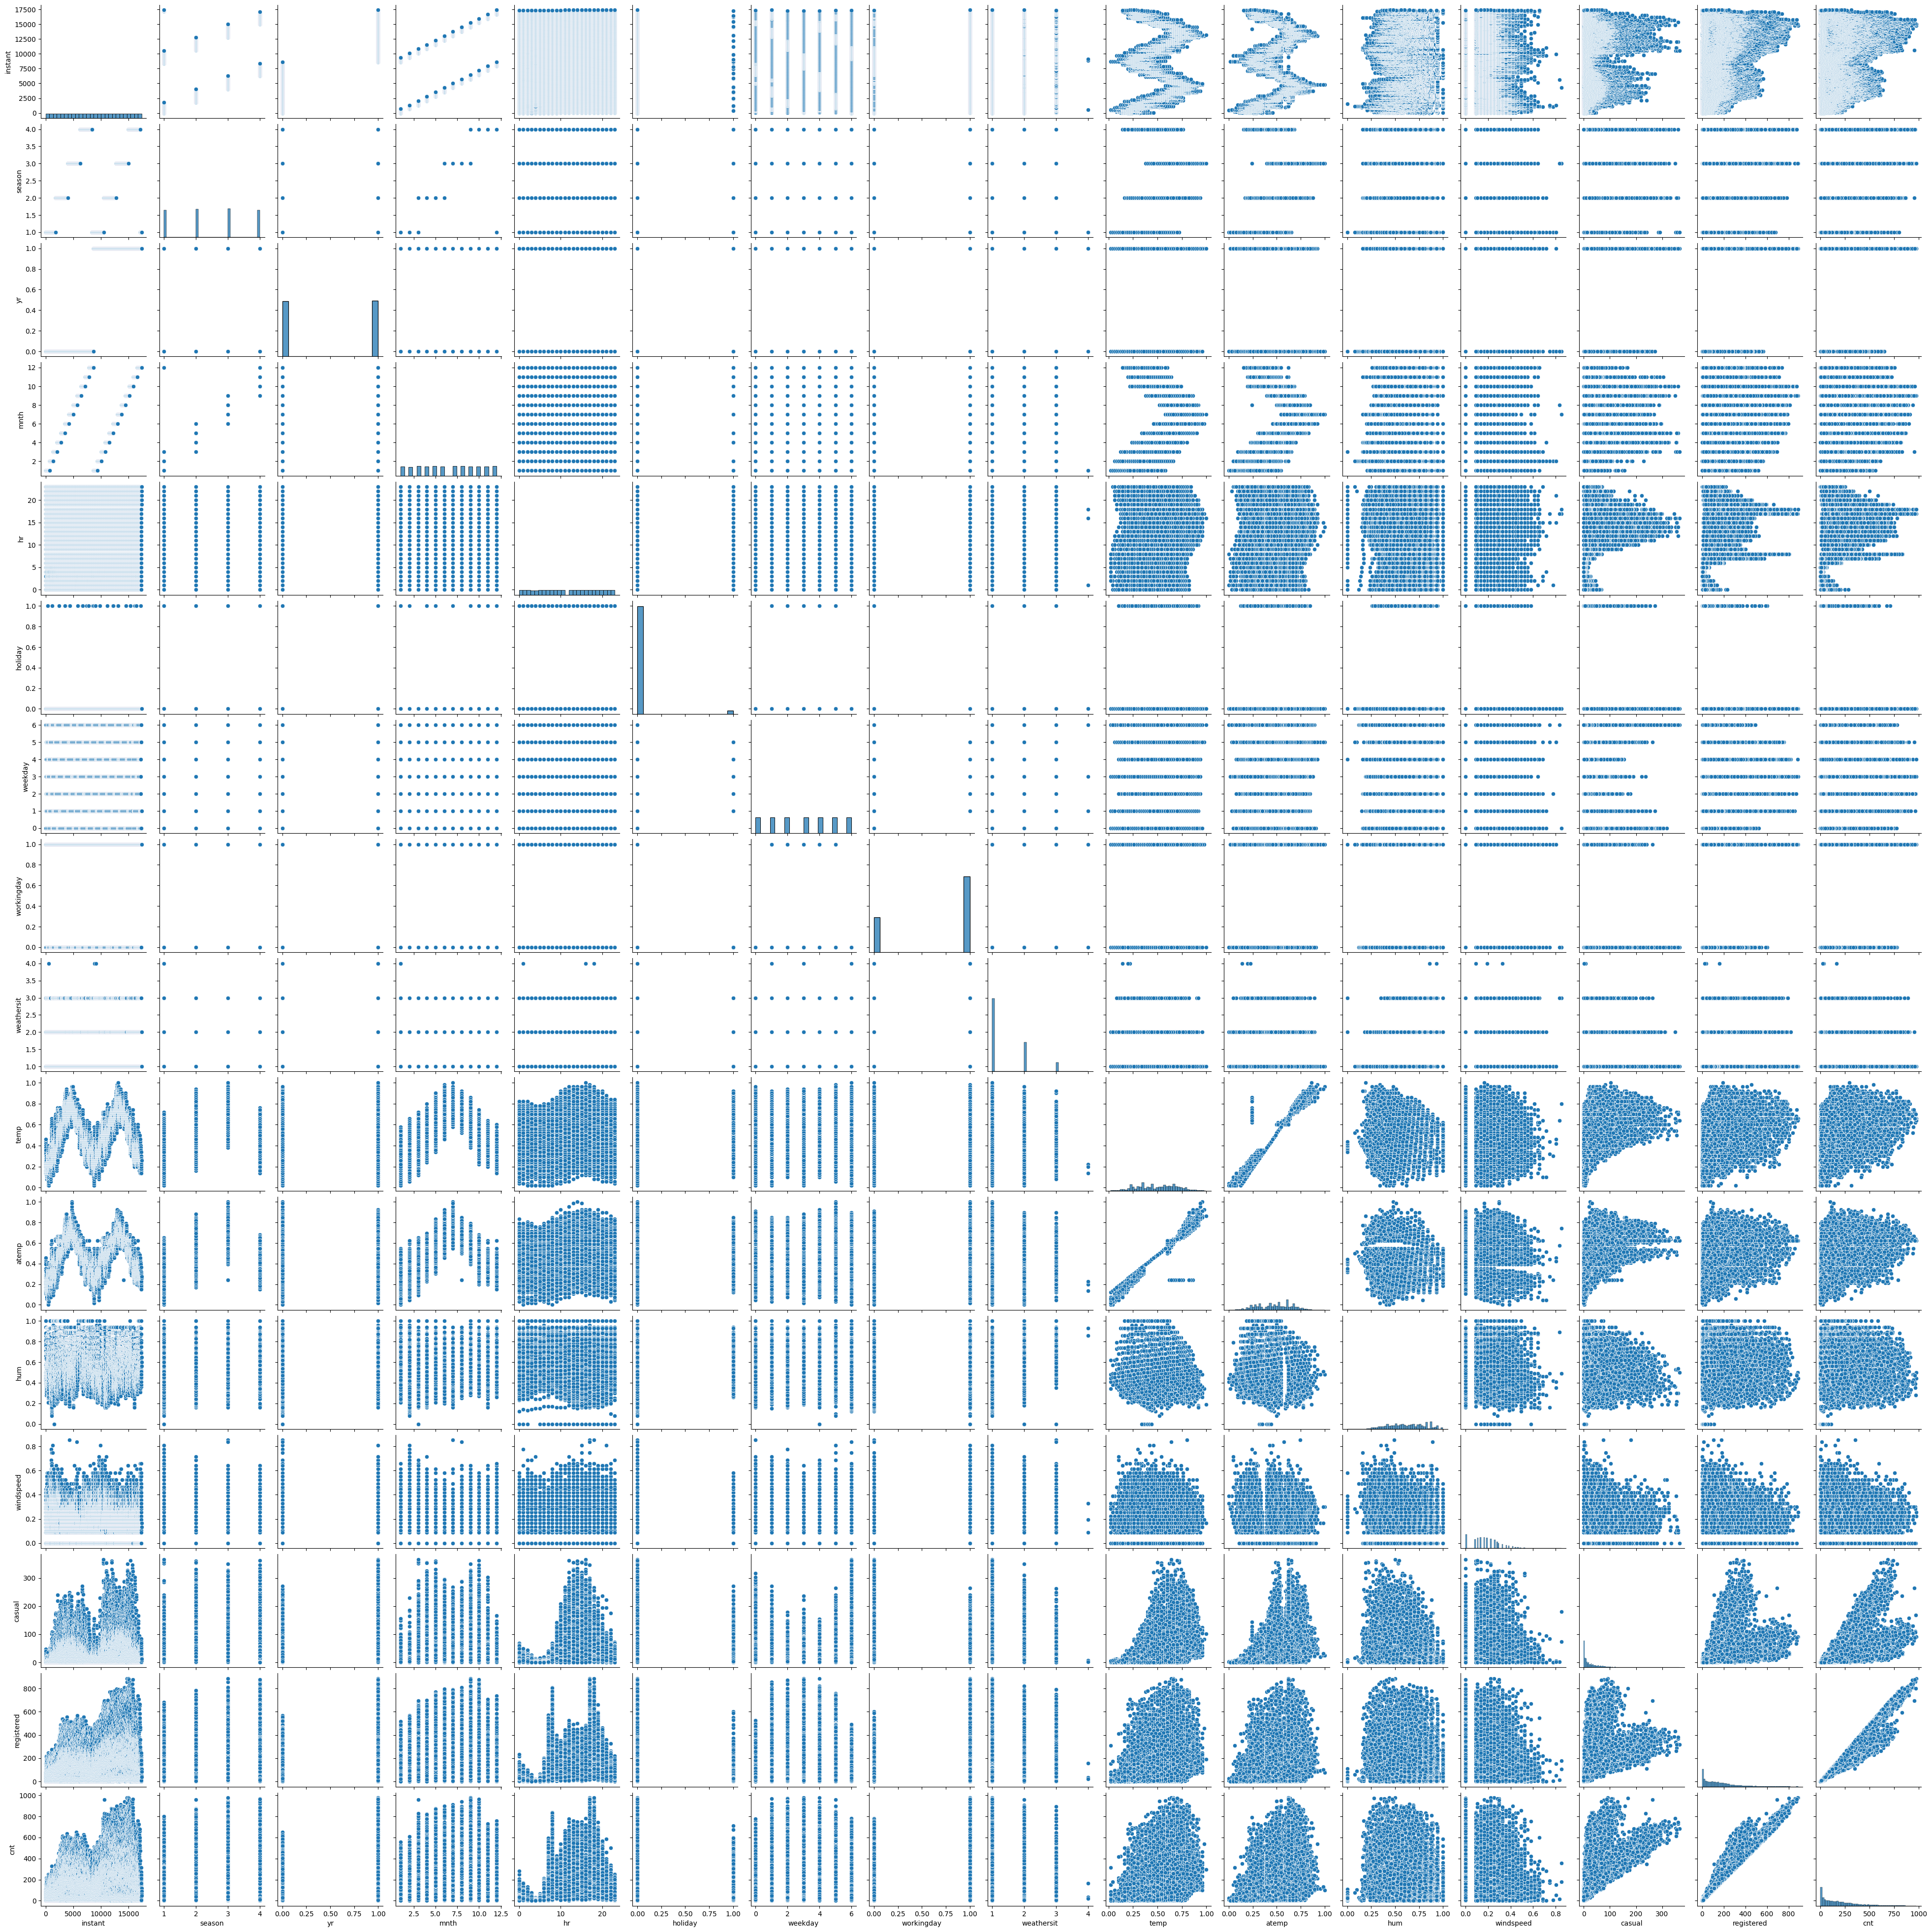

In [84]:
# visualise data
sns.pairplot(data[["instant","dteday", "season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]])
plt.show()

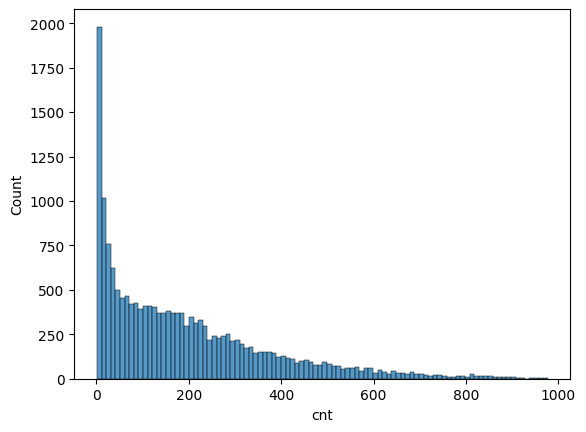

In [13]:
sns.histplot(data=data, x='cnt', binwidth=10)
plt.show()

In [33]:
data.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

/tmp/ipykernel_4600/3431472283.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data.corr(), cmap='viridis')


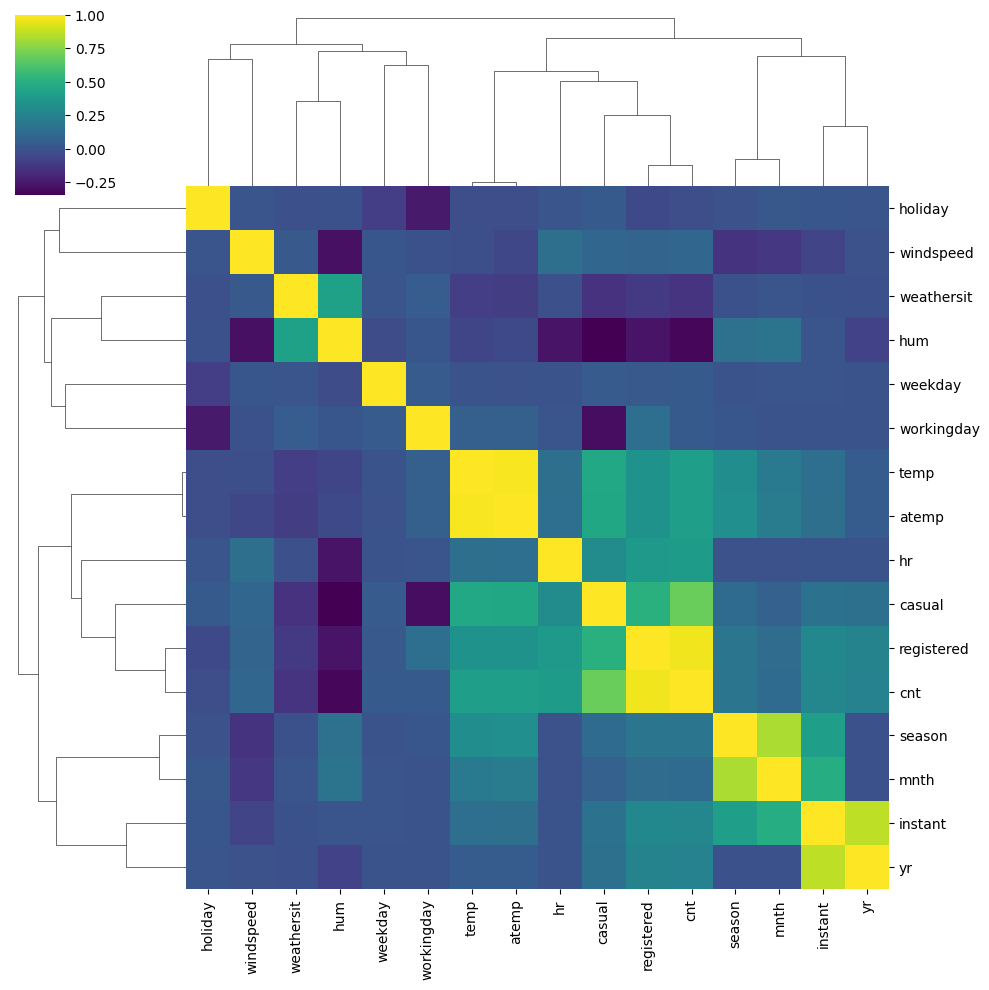

In [14]:
sns.clustermap(data.corr(), cmap='viridis')
plt.show()

In [50]:
column_index = 16
print("Column name at index", column_index, ":", data.columns[column_index])

Column name at index 16 : cnt


In [66]:
X = data.iloc[:,:16].values
y = data.iloc[:,16].values

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

# let's further split the training set into a training and a validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size= X_test.shape[0] / X_train.shape[0],  
                                                  random_state=42)

In [70]:
for x,y,name in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]))
    df.columns = data.columns
    df.to_csv(f'bike_data_split/{name}.csv')

In [71]:
performances = []

In [72]:
mean_value = y_train.mean()
model_name = 'dummy'
for y,nsplit in zip([y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    performance = np.sqrt(mean_squared_error(y, 
                                             [mean_value]*y.shape[0]))
    r2 = r2_score(y, [mean_value]*y.shape[0])
    performances.append({'model': model_name,
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [73]:
# now fitting a model with weather predictors
weather_cols = [9, 10, 11, 12, 13]  # Select columns 9-13
reg = LinearRegression().fit(X_train[:, weather_cols], y_train)
pkl.dump(reg, file=open(f'bike_models/linear-weather.pkl', 'wb'))  # Save the model


In [75]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    preds = reg.predict(x[:,weather_cols])
    r2 = r2_score(y, preds)
    performance = np.sqrt(mean_squared_error(y, preds))
    performances.append({'model': 'llinear-weather',
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [79]:
for k in [3,5,10,20,30]:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train[:,weather_cols], y_train)
    pkl.dump(neigh, file=open(f'bike_models/knn-weather-{k}.pkl','wb')) # save the model
    for x,y,nsplit in zip([X_train, X_val, X_test],
                        [y_train, y_val, y_test],
                        ['train', 'val', 'test']):
        preds = neigh.predict(x[:,weather_cols])
        r2 = r2_score(y, preds)
        performance = np.sqrt(mean_squared_error(y, preds))
        performances.append({'model': f'knn-demographics-{k}',
                            'split': nsplit,
                            'rmse': performance.round(4),
                            'r2': r2.round(4)})

This time, let's also standardize the data, which we will need for regularization.
Note that I am fitting the standardizer to the training set, and applying the same transformation to validation and test set.
Can you guess why I am doing that?

In [166]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Model estimation
Let's re-estimate our baseline models. This time, we wrap model evaluation into a function, to make our code compact.

In [10]:
performances = []

In [11]:
def evaluate(model, X, y, nsplit, model_name, constant_value=None):
    ''' Evaluates the performance of a model 
    Args:
        model (sklearn.Estimator): fitted sklearn estimator
        X (np.array): predictors
        y (np.array): true outcome
        nsplit (str): name of the split
        model_name (str): string id of the model
        constant_value (int or None): relevant if the model predicts a constant
    '''
    if constant_value is not None:
        preds = np.array([constant_value] * y.shape[0])
    else:
        preds = model.predict(X)
    r2 = r2_score(y, preds)
    performance = np.sqrt(mean_squared_error(y, preds))
    performances.append({'model': model_name,
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

First, let's recompute the dummy model

In [184]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    evaluate(model=None, 
             X=x, y=y, 
             nsplit=nsplit, 
             model_name='dummy', 
             constant_value=y_train.mean())

Now let's fit a linear model with only demographic predictors

In [185]:
dem_cols = range(4)
reg = LinearRegression().fit(X_train[:,dem_cols], y_train)
for x,y,nsplit in zip([X_train, X_val, X_test],
                      [y_train, y_val, y_test],
                      ['train', 'val', 'test']):
    evaluate(model=reg, 
             X=x[:,dem_cols], y=y, 
             nsplit=nsplit, 
             model_name='linear-model-dem')

### Full model
Finally, let's add all our predictors. First, let's fit a regular linear model, and evaluate its performance on all splits.
To make things more interesting, you can also add Polynomial models here (see previous week's notebook)

In [186]:
reg = LinearRegression().fit(X_train, y_train)
for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    evaluate(model=reg, 
                X=x, y=y, 
                nsplit=nsplit, 
                model_name=f'linear-full')

In [187]:
perf_df = pd.DataFrame(performances)

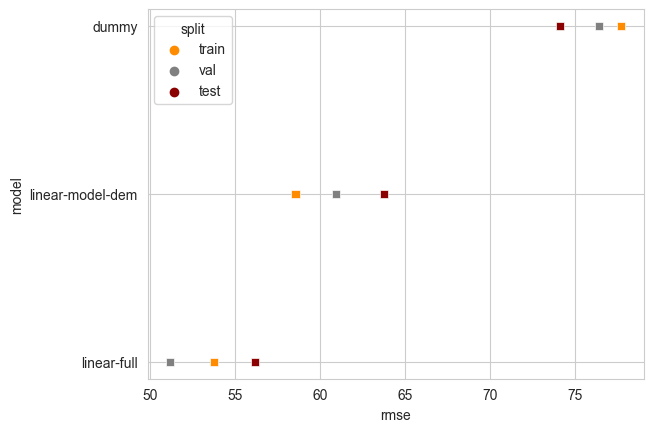

In [188]:
sns.set_style('whitegrid')
sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False), 
                y='model', 
                x='rmse', 
                marker='s', 
                hue='split', palette=['darkorange', 'grey', 'darkred'])
plt.show()

Alright, our best model is still the linear model. In our case there is not a whole lot of overfitting, but let's try to reduce the little there is nonetheless.
As we have discussed in the lecture, one way to do it is to apply regularization. We don't have any strong prior 
for whether L1 or L2 would be most appropriate in our case. Let's implement both!

For Ridge, we will use this estimator: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

For LASSO, we will use this estimator: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

We will need to tune our regulariation parameter, let's first do it manually, and we can then look at one way to do this automatically.

Let's also store the models to check what happens as we increase the parameter values!

In [189]:
models = {} # storing fitted models in the next chunk
models['linear-0.0'] = reg

In [190]:
for alpha in [0.01, 0.1, 0.2, 0.5, 1.0, 20.0, 10.0, 100.0, 1000.0]:
    for est in [Lasso, Ridge]:
        if est == Lasso:
            id = 'lasso'
        else:
            id = 'ridge'
        reg = est(alpha=alpha).fit(X_train, y_train)
        models[f'{id}-{alpha}'] = reg
        for x,y,nsplit in zip([X_train, X_val, X_test],
                            [y_train, y_val, y_test],
                            ['train', 'val', 'test']):
            evaluate(model=reg, 
                    X=x, y=y, 
                    nsplit=nsplit, 
                    model_name=f'linear-{id}-alpha-{alpha}')

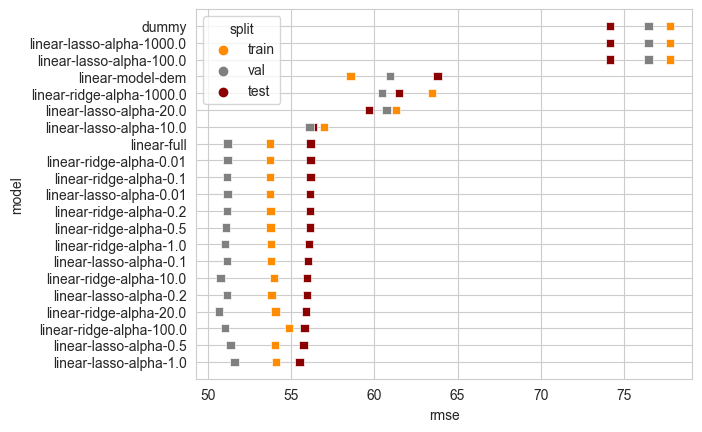

In [191]:
perf_df = pd.DataFrame(performances)
sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False), 
                y='model', 
                x='rmse', 
                marker='s', 
                hue='split', palette=['darkorange', 'grey', 'darkred'])
plt.show()

As you can see, our test set has a slightly lower error once the regularization is added.
Let's visualize what happens to the coefficients, in both the L1 and L2 scenario, once the amount of regularization we add increases. Let's extract coefficients, store them into a dataframe, and plot them.

In [197]:
coefs = pd.DataFrame(np.vstack([v.coef_.round(4) for v in models.values()]),
                     columns=data.iloc[:,:10].columns)
coefs['mtype'] = [k.split('-')[0] for k in models.keys()]
coefs['alpha'] = [float(k.split('-')[1]) for k in models.keys()]
coefs = pd.melt(coefs, id_vars=['mtype', 'alpha'])# turning data into long format 

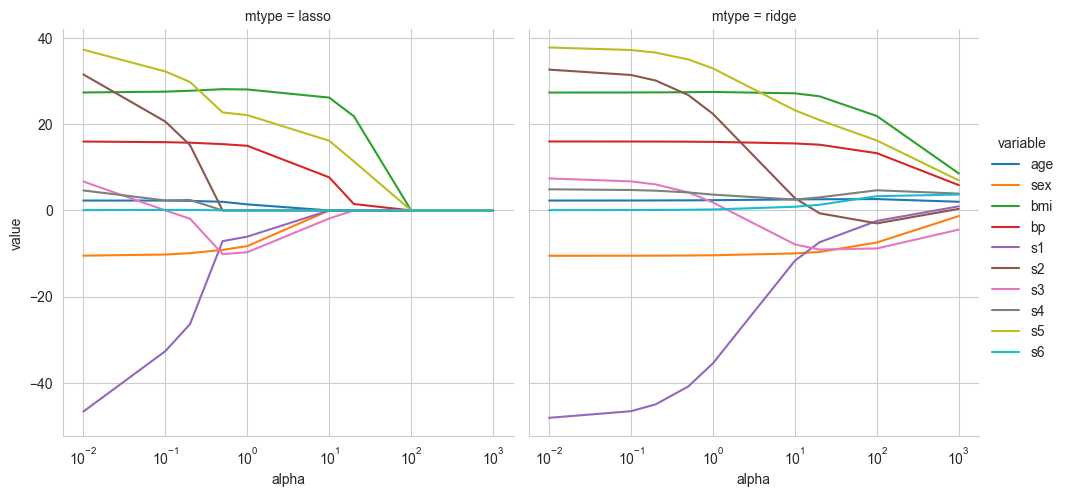

In [198]:
grid = sns.relplot(data=coefs[coefs['mtype']!='linear'], 
                   x='alpha', y='value', 
                   hue='variable', col='mtype', kind='line')
grid.set(xscale="log")

As you can see, what we know about the effect of L1 and L2 loss is very visible here. Also note that the way coefficients are shrunk over alphas is fairly consistent, i.e., as alpha increases, coefficients monotonically go down or up. Now, let's visualize the weights of the non-regularized linear regression versus the weights of the best LASSO and the best Ridge model that outperform the linear model.

In [207]:
perf_df[perf_df['split']=='test'].sort_values(by='rmse', ascending=True)

model split     rmse      r2
35     linear-lasso-alpha-1.0  test  55.5073  0.4360
29     linear-lasso-alpha-0.5  test  55.7557  0.4309
56   linear-ridge-alpha-100.0  test  55.8093  0.4298
44    linear-ridge-alpha-20.0  test  55.8914  0.4282
23     linear-lasso-alpha-0.2  test  55.9471  0.4270
50    linear-ridge-alpha-10.0  test  55.9586  0.4268
17     linear-lasso-alpha-0.1  test  56.0059  0.4258
38     linear-ridge-alpha-1.0  test  56.0856  0.4242
32     linear-ridge-alpha-0.5  test  56.1190  0.4235
26     linear-ridge-alpha-0.2  test  56.1481  0.4229
11    linear-lasso-alpha-0.01  test  56.1536  0.4228
20     linear-ridge-alpha-0.1  test  56.1601  0.4226
14    linear-ridge-alpha-0.01  test  56.1721  0.4224
8                 linear-full  test  56.1735  0.4224
47    linear-lasso-alpha-10.0  test  56.3220  0.4193
41    linear-lasso-alpha-20.0  test  59.6877  0.3478
62  linear-ridge-alpha-1000.0  test  61.4891  0.3079
5            linear-model-dem  test  63.7819  0.2553
53   linear-lasso-alpha-100.0  test  74.1421 -0.0063
59  linear-lasso-alpha-1000.0  test  74.1421 -0.0063
2                       dummy  test  74.1421 -0.0063

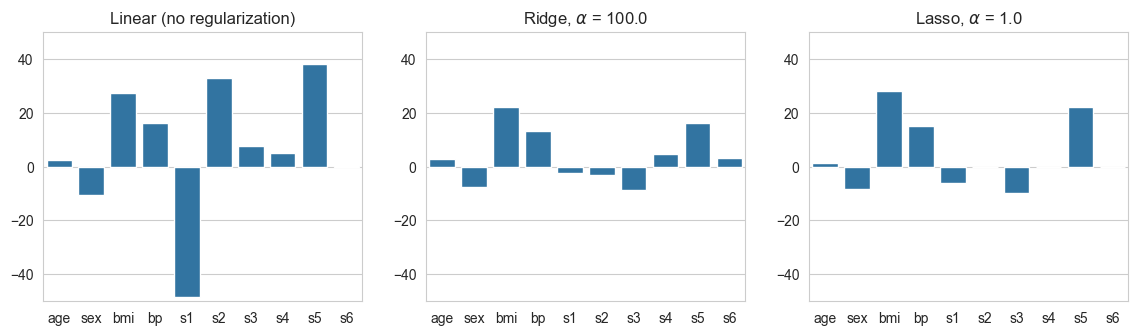

In [208]:
fig, ax = plt.subplots(ncols=3, figsize=(14,3.5))
sns.barplot(x=data.iloc[:,:10].columns, y=models['lasso-1.0'].coef_, ax=ax[2], color=sns.color_palette()[0])
sns.barplot(x=data.iloc[:,:10].columns, y=models['ridge-100.0'].coef_, ax=ax[1], color=sns.color_palette()[0])
sns.barplot(x=data.iloc[:,:10].columns, y=models['linear-0.0'].coef_, ax=ax[0], color=sns.color_palette()[0])
for a in ax:
    a.set_ylim(-50,50)
ax[2].set_title('Lasso, $\\alpha$ = 1.0')
ax[1].set_title('Ridge, $\\alpha$ = 100.0')
ax[0].set_title('Linear (no regularization)')
plt.show()

A few things to note here:
1. Coefficients are consistenly smaller when regularization is added;
2. The sign and relative magnitude of coefficients is fairly similar across LASSO and Ridge
3. The most two most notable effects are:
    - A large reduction in the size of coefficietns for s1 and s2
    - A change in directionality for the effect of s3

If we look back at the correlation matrix for our data we will see why this happens: shrinkage or feature has a pretty strong effect in the presence of collinearity.
While previously collineary features (`sex` and `s3`, and `s1` and `s2`) were estimated to have large but opposite coefficients, Ridge and Lasso estimate smaller and more consistent coefficients, which reduce model variance and the extent to which overfitting happens.

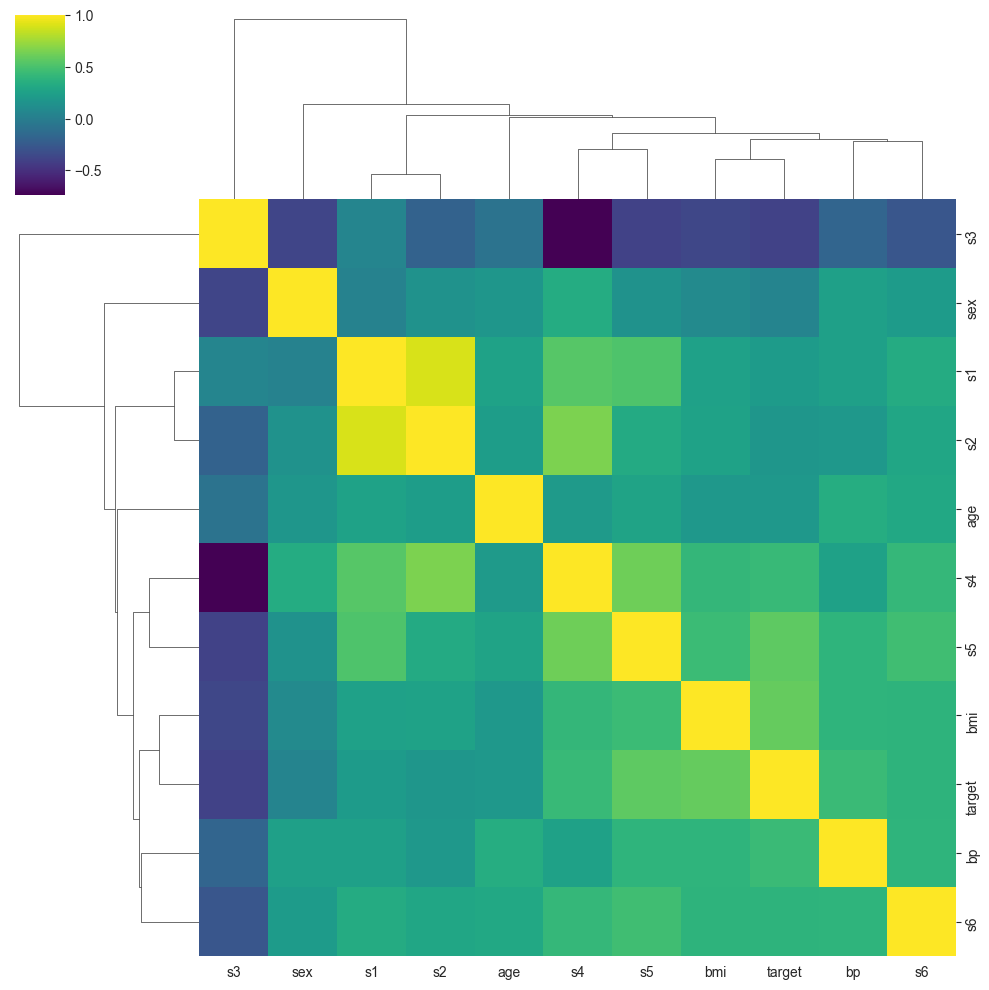

In [209]:
sns.clustermap(data.corr(), cmap='viridis')

A couple of final notes: while we have only estimated Ridge and LASSO for linear models, L1 and L2 regularization can be applied to virtually any model.
As we will see next week, `RandomForest` models, for example, have an alpha parameter that represents the amount of regularization added to the loss.
Finally, while (for pedagogical reasons) we have looked at the effect of a wide range of alphas, you can use `RidgeCV` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) or `LassoCV` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) from sklearn to select the best alpha using cross-validation on the training set.

Next week, we will also look at `GridSearchCV` as a general way to select model hyperparameters.